In [87]:
%matplotlib notebook

In [17]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

In [19]:
wine_df = pd.read_csv('Wine_data1.csv', encoding="ISO-8859-1")

wine_df.head()

,Name,Rating,Winery,Area,Province,Country,Varietal,Vintage,Style,Wine Type,ID
0,IV,93.433789,Layor Wines,Nova Scotia,NaN,Canada,Vidal,2013,Dessert,White,55663e3e942360030000000e
1,Layor Gold,90.627673,Layor Wines,Nova Scotia,NaN,Canada,Vidal,2013,Dessert,White,55663e00942360030000000d
2,The Evangelist - Late Harvest Viognier,89.971973,Ascension Cellars,Central Coast,CA,USA,Viognier,2012,Dessert,White,5564efe1b4f0c10300000058
3,Soul Shaker,89.506316,Ascension Cellars,Central Coast,CA,USA,"Cabernet Sauvignon, Petit Verdot, Syrah, Merlot",2012,NaN,Red,5564efe1b4f0c1030000009c
4,"Dalliance ""GSMv""",89.421973,Ascension Cellars,Central Coast,CA,USA,"Grenache, Syrah, Mourvedre, Viognier",2011,NaN,Red,5564efe1b4f0c1030000009b


In [20]:
#Data Clanup

#Correcting United States to USA, Remove counties that don't exist

wine_df['Country'] = wine_df['Country'].replace({'United States': 'USA', 'California': 'USA', 'Franc': 'France', 'French': 'France'})

cleaned_df = wine_df.loc[(wine_df['Country'] != 'Blind') & (wine_df['Country'] != 'Macedonia')]

# cleaned2_df = cleaned_df.dropna(subset = ['Varietal'])

# len(cleaned_df) - len(cleaned_df.dropna(subset = ['Vintage']))

# cleaned_df['Vintage'].value_counts()

In [21]:
#Bar Chart of Countries with Average Rating

winery_count = cleaned_df.groupby('Country').count()['Winery']

wine_rating = cleaned_df.groupby('Country').mean()['Rating']

winery_count_df = pd.DataFrame({'Winery Count': winery_count})

wine_rating_df = pd.DataFrame({'Wine Rating': wine_rating})

top10_country = winery_count_df.nlargest(10, 'Winery Count') #10 largest by Winery Count

top10_rating = wine_rating_df.nlargest(10, 'Wine Rating')

merge_df = top10_country.merge(wine_rating_df, on = 'Country')

# top10_country.sort_values(by = 'Winery Count', ascending = False).plot(kind='bar', ylabel = 'Count of Wineries')

# wine_rating_df.plot(kind='line', secondary_y = True)

# plt.legend()

# plt.show()
merge_df.head(10)

,Winery Count,Wine Rating
Country,,
USA,4213,77.102442
Canada,2555,76.416850
France,1716,76.952722
Italy,1611,76.853060
Spain,588,76.671740
Australia,460,76.146005
Argentina,421,75.767816
Chile,311,75.813061
New Zealand,241,76.859121


In [39]:
cleaned_df.head()
# Put treatments into a list for for loop (first to calculate the final tumor volume of each mouse across
# the four treatment regiments and later for plot labels)
top_country_list = ['USA','Canada', 'France', 'Italy','Spain','Australia','Argentina','Chile','New Zealand','South Africa']

# Create empty list to fill with tumor vol data (for plotting)
wine_ratings = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in top_country_list: 
    wine_rate = cleaned_df.loc[cleaned_df["Country"]==x]["Rating"]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    wine_ratings.append(wine_rate)
    
    # outlier formula should be here 
    quartiles = wine_rate.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print("----------")
    print(f"For {x}, the lower quartile of ratings is: {lowerq}")
    print(f"For {x}, the upper quartile of ratings is: {upperq}")
    print(f"For {x}, the interquartile range of ratings is: {iqr}")
    print(f"For {x}, the the median of ratings is: {quartiles[0.5]} ")
      
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier = wine_rate.loc[(wine_rate<lower_bound)|(wine_rate>upper_bound)].count()
    print(x + " has " + str(outlier) + " wine rating outliers.")



----------
For USA, the lower quartile of ratings is: 75.76894659999998
For USA, the upper quartile of ratings is: 78.94394659999999
For USA, the interquartile range of ratings is: 3.1750000000000114
For USA, the the median of ratings is: 78.01894659999999 
USA has 275 wine rating outliers.
----------
For Canada, the lower quartile of ratings is: 74.62205193999999
For Canada, the upper quartile of ratings is: 78.8439466
For Canada, the interquartile range of ratings is: 4.221894660000004
For Canada, the the median of ratings is: 77.86894659999999 
Canada has 106 wine rating outliers.
----------
For France, the lower quartile of ratings is: 75.87832159999999
For France, the upper quartile of ratings is: 78.99394659999999
For France, the interquartile range of ratings is: 3.1156249999999943
For France, the the median of ratings is: 78.21269659999999 
France has 158 wine rating outliers.
----------
For Italy, the lower quartile of ratings is: 75.96698640666666
For Italy, the upper quartil

<IPython.core.display.Javascript object>


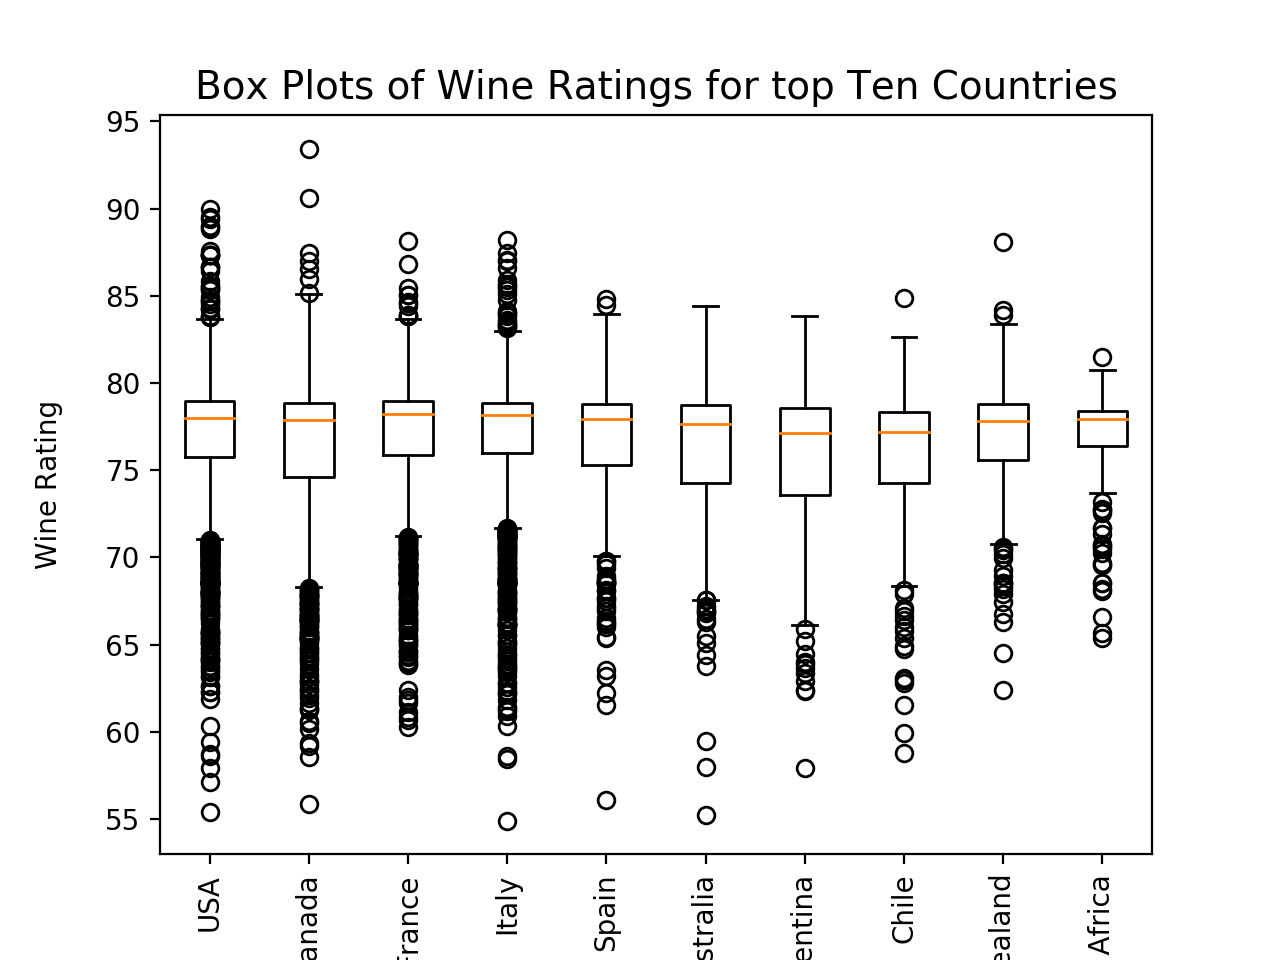

In [48]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(wine_ratings)
plt.xlabel("Country", labelpad=15)
plt.ylabel("Wine Rating", labelpad=15)
plt.xticks([1,2,3,4,5,6,7,8,9,10],['USA','Canada', 'France', 'Italy','Spain','Australia','Argentina','Chile','New Zealand','South Africa'],rotation="vertical")
plt.title("Box Plots of Wine Ratings for top Ten Countries", y=1, fontsize=14);
plt.show()